In [1]:
#Importing the required packages
import numpy as np
import pandas
import random
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from scipy import optimize as op

In [2]:
#Data for the first part of the assignment
#Note the data is changed from a txt file to a csv file 
data = pandas.read_csv('ex2data1.csv', header = None )
dim = np.array(data.shape)
#The last column of the file includes the labels 
x = np.array(data.iloc[:,0:(dim[1]-1)])
label = np.array(data.iloc[:,(dim[1]-1)])

In [3]:
#Sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [4]:
#Logistic regression cost function
#Lam is the regularization term
def costfn (theta,x,label,lam):
    m = np.array(x.shape)[0]*1.0
    z = theta[0]+ np.matmul(x,theta[1:])
    h = sigmoid(z)
    # Cost function without the regularization term
    cost = -1.0/m * sum(label*np.log(h)+(1-label)*np.log(1-h))
    # Cost function with the regularization term
    cost_regularized = cost + lam/(2*m) * sum (theta[1:]**2)
    return cost_regularized

In [5]:
#Gradient Calculation
#"lam" is the regularization constant
def grad(theta,x,label,lam):
    m = np.array(x.shape)[0]*1.0
    z = theta[0]+ np.matmul(x,theta[1:])
    h = sigmoid(z)
    grad = np.zeros(np.array(x.shape)[1]+1)
    grad[0] = sum(h-label)/m
    grad[1:] = np.matmul((h-label).transpose(),x)/m+ lam/m * theta[1:]
    return grad  

In [6]:
# optimizing the cost function 
#Dont worry about the warning 
lam = 0.0 # No regularization
res = op.minimize(costfn, np.zeros(3), args=(x,label,lam), method=None, jac=grad, options={'maxiter':400})

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


In [7]:
# probability of acceptance where the first test score is 45 and the second test score is 85
sigmoid(res.x[0]+res.x[1]*45+res.x[2]*85)

0.7762907240588949

In [8]:
# Probability --> binary Labels 
def pred(x,theta):
    prediction = sigmoid(theta[0]+ np.matmul(x,theta[1:]))
    return [round(p) for p in prediction]
# Accuracy calculator
def accuracy(p,label):
    diff = abs(p-label)
    a = (len(label)-sum(diff))/len(label) 
    return a

In [9]:
# Model accuracy (training data)
p = pred(x,res.x)
accuracy(p,label)

0.89

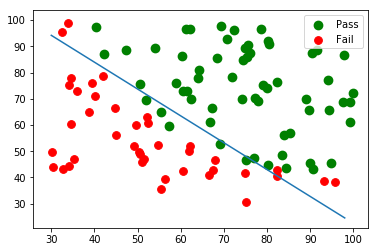

In [10]:
neg = label == 0
pos = label == 1
ax = plt.gca()
ax.scatter(x[pos][:,0], x[pos][:,1], c='g', s=60, linewidth=2, label='Pass')
ax.scatter(x[neg][:,0], x[neg][:,1], c='r', s=60, label='Fail')
ax.legend(frameon= True, fancybox = True)
M1 = int(max(x[:,0]))
m1 = int(min(x[:,0]))
x1 = np.array(range(m1,M1))
#Equation for x2 is solved for w.r.t x1
x2 = -1.0*(res.x[0]+res.x[1]*x1)/res.x[2]
ax.plot(x1,x2)

In [11]:
# Part two of the assignment 
data = pandas.read_csv('ex2data2.csv', header = None )
dim = np.array(data.shape)
x = np.array(data.iloc[:,0:(dim[1]-1)])
label = np.array(data.iloc[:,(dim[1]-1)])
# Feature mapping: map the features into all polynomial terms of x1 and x2 up to the sixth power
poly = pp.PolynomialFeatures(6,include_bias=False)
poly_features = poly.fit_transform(x)

In [12]:
# No regularization
lam = 0.0
res2 = op.minimize(costfn, np.zeros(28), args=(poly_features, label,lam), 
                   method=None, jac=grad, options={'maxiter':3000})
p = pred(poly_features,res2.x)
accuracy(p,label)

0.9152542372881356

In [13]:
#Regularization term is 1 
lam = 1.0
res2 = op.minimize(costfn, np.zeros(28), args=(poly_features, label,lam), 
                   method=None, jac=grad, options={'maxiter':3000})
p = pred(poly_features,res2.x)
accuracy(p,label)

0.8305084745762712

In [14]:
#Regularization term is 100 
lam = 100.0
res2 = op.minimize(costfn, np.zeros(28), args=(poly_features, label,lam), 
                   method=None, jac=grad, options={'maxiter':3000})
p = pred(poly_features,res2.x)
accuracy(p,label)

0.6101694915254238

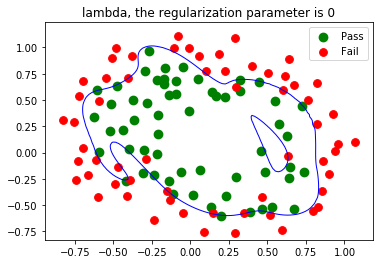

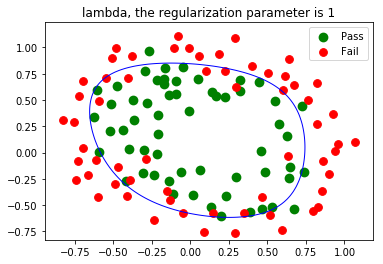

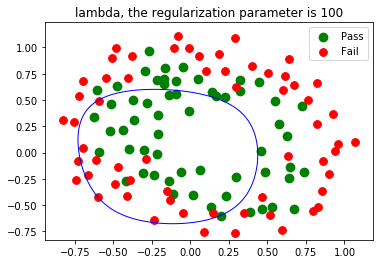

In [15]:
def decision_bound(x,theta):
    neg = label == 0
    pos = label == 1
    ax = plt.gca()
    ax.scatter(x[pos][:,0], x[pos][:,1], c='g', s=60, linewidth=2, label='Pass')
    ax.scatter(x[neg][:,0], x[neg][:,1], c='r', s=60, label='Fail')
    ax.legend(frameon= True, fancybox = True)
    M1 = max(x[:,0])
    m1 = min(x[:,0])
    x1 = np.linspace(m1, M1, 100)
    x2 = np.linspace(m1, M1, 100)
    X1, X2 = np.meshgrid(x1,x2)
    x_p = poly.fit_transform(zip(X1.ravel(),X2.ravel()))
    F = sigmoid(theta[0]+np.matmul(x_p,theta[1:]))
    F = F.reshape(X1.shape)
    ax.contour(X1, X2, F,[0.5], linewidths=1, colors='b')
#plotting the decision boundary with [0.0,1,100] regularization parameters
lam_val = [0.0,1,100]

for i in range(0,len(lam_val)) :
    lam = lam_val[i]
    res2 = op.minimize(costfn, np.zeros(28), args=(poly_features, label,lam), 
                   method=None, jac=grad, options={'maxiter':3000})
    plt.figure(figsize=(20, 4))
    plt.subplot(1,3,i+1)
    p = pred(poly_features,res2.x)
    accuracy(p,label)
    decision_bound(x,res2.x)
    plt.title('lambda, the regularization parameter is %i'%lam)